# Stabla odlucivanja

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report
from termcolor import colored
from sklearn.preprocessing import OrdinalEncoder


Klasifikacija pusaca

Ucitavanje i analiza skupa podataka:

In [2]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/smoking.csv")
data.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [3]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


 Rad sa nedostajucim vrednostima:

In [4]:
data.isna().any().any()

False

In [5]:
data.isna().any()

ID                     False
gender                 False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental caries          False
tartar                 False
smoking                False
dtype: bool

Zakljucujemo da u skupu nema nedostajucih vrednosti.

In [6]:
oral = data['oral'].unique()
gender = data['gender'].unique()
tartar = data['tartar'].unique()
gender, oral, tartar

(array(['F', 'M'], dtype=object),
 array(['Y'], dtype=object),
 array(['Y', 'N'], dtype=object))

In [7]:
data['oral'] = data['oral'].replace("Y", 1)
data['gender'] = data['gender'].replace("F", 1)
data['gender'] = data['gender'].replace("M", 1)
data['tartar'] = data['tartar'].replace("Y", 1)
data['tartar'] = data['tartar'].replace("N", 0)


Podela na ulazne i ciljne atribute:
    (Informacije o tome da li je osoba pusac se nalaze u koloni smoking sto predstavlja ciljni atrinut.
     Ostali atributi se koriste za predikciju - ulazni atributi)

In [8]:
Y = data['smoking']
X = data.drop('smoking', axis=1)
feature_names = X.columns
X.head()


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1
1,1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,1,0,1
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,1,0,0
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,1,0,1
4,4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,1,0,0


In [9]:
Y.unique()

array([0, 1])

Klasa Y ima vrednosti 0 i 1 sto znaci da resavamo problem binarne klasifikacije.

Provera balansiranosti klasa:

In [10]:
br1 = 0;
br0 = 0;
for y in Y:
    if y == 1:
        br1+=1
    else:
        br0+=1
print('Broj instanci prve klase: ', br0)
print('Broj instanci druge klase: ',br1)

Broj instanci prve klase:  35237
Broj instanci druge klase:  20455


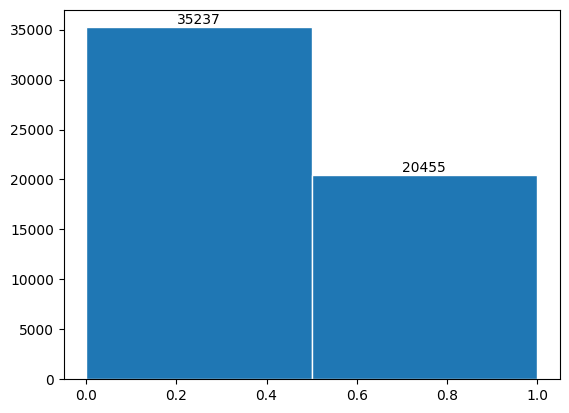

In [11]:
freq, bins, _ = plt.hist(Y, edgecolor='white', bins=2)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             
               xytext = (0,0.2),             
               textcoords = "offset points", 
               ha = 'center', va = 'bottom',
               )

plt.show()


Na osnovu histograma vidimo da se u skupu nalazi 35237 osoba koje nisu pusaci i 20455 osoba koje jesu pusaci.
Primecujemo blagu nebalansiranost.

Analiza ulaznih atributa i podela na test i trening skup:

In [12]:
X.describe()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
count,55692.000000,55692.0,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.0,55692.000000,55692.000000
mean,27845.500000,1.0,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,...,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,1.0,0.213334,0.555556
std,16077.039933,0.0,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,...,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.0,0.409665,0.496908
min,0.000000,1.0,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,...,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,1.0,0.000000,0.000000
25%,13922.750000,1.0,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,...,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,1.0,0.000000,0.000000
50%,27845.500000,1.0,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,...,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,1.0,0.000000,1.000000
75%,41768.250000,1.0,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,...,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,1.0,0.000000,1.000000
max,55691.000000,1.0,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,...,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.0,1.000000,1.000000


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y, random_state=12)


In [14]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Izvestaj o klasifikaciji za model{} nad {} podacima".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Matrica konfuzije za model {} nad {} podacima ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['1', '0'], index=['1', '0']))
    print("---------------------------------------------------------------------------------")
    


In [31]:
def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['1', '0'], feature_names=feature_names, filled=True)
    plt.title("Stablo odlucivanja dubine{} sa {} cvorova".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parametri modela {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")


In [32]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train) # treninranje modela


DecisionTreeClassifier()

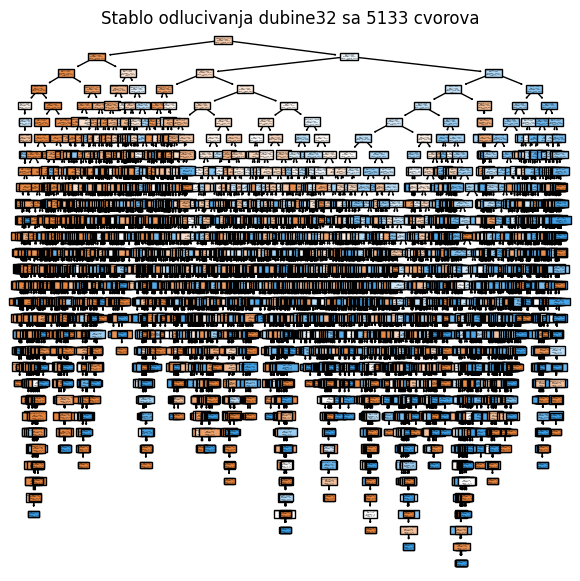

---------------------------------------------------------------------------------
Parametri modela DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [33]:
plot_decision_tree(dtc, feature_names)

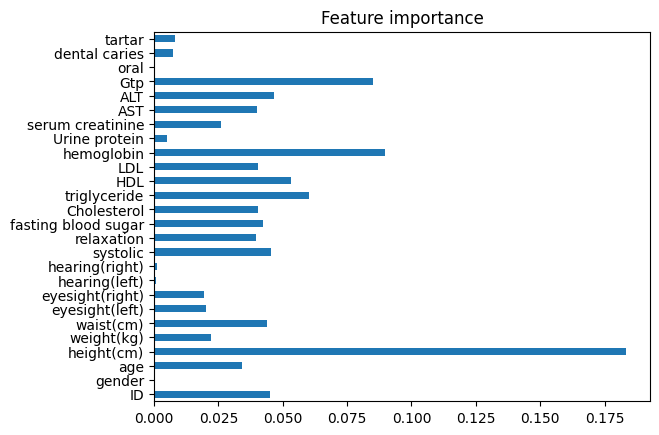

In [17]:
pd.Series(dtc.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [18]:
report(dtc, X_train, Y_train)

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad training podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23608
           1       1.00      1.00      1.00     13705

    accuracy                           1.00     37313
   macro avg       1.00      1.00      1.00     37313
weighted avg       1.00      1.00      1.00     37313

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad training podacima 
---------------------------------------------------------------------------------
       1      0
1  23608      0
0      0  13705
---------------------------------------------------------------------------------


Izvestaj nad trening skupom nam daje tacnost 1. Na osonovu toga pretpostavljamo da je doslo do preprilagodjavanja.

In [19]:
report(dtc, X_test, Y_test, "test")

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad test podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     11629
           1       0.65      0.65      0.65      6750

    accuracy                           0.74     18379
   macro avg       0.72      0.72      0.72     18379
weighted avg       0.74      0.74      0.74     18379

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad test podacima 
---------------------------------------------------------------------------------
      1     0
1  9258  2371
0  2344  4406
---------------------------------------------------------------------------------


Izvestaj nad trening skupom nam daje tacnost 0.8. Pokusacemo da unapredimo model promenom hiper-parametara, jer i ako ima veliku preciznost pravi vise FN gresaka.

Probacemo razlicite dubine drveta.

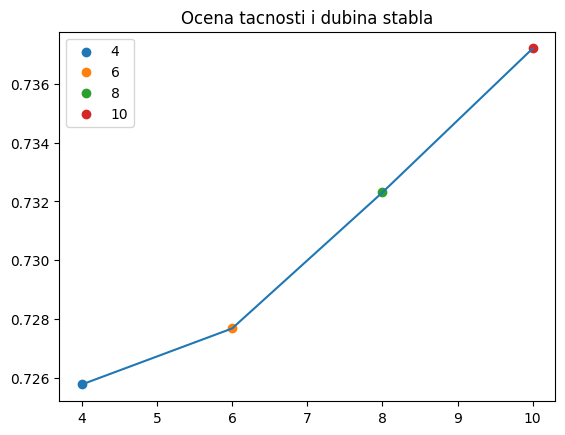

[0.7257739811741661, 0.7276783285271233, 0.7323031720985907, 0.7372000652919093]


In [20]:
from sklearn.metrics import accuracy_score
model_acc = []
depth_values = [4, 6, 8, 10]

for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, Y_train) # treniramo model
    y_pred = model.predict(X_test) #evaluiramo
    model_acc.append(accuracy_score(Y_test, y_pred))

#plt.plot(model_acc)
for d, acc in zip(depth_values, model_acc):
    plt.scatter(d, acc, label=d)
    
plt.plot(depth_values, model_acc)
plt.legend()
plt.title("Ocena tacnosti i dubina stabla")
plt.show()
print(model_acc)


Zakljucujemo da je dubina 10 najbolja.

In [21]:
model_acc_crit = []
for crit in ['gini', 'entropy']:
    model = DecisionTreeClassifier(max_depth=10, criterion=crit)
    model.fit(X_train, Y_train) # treniramo model
    y_pred = model.predict(X_test) #evaluiramo
    model_acc_crit.append(accuracy_score(Y_test, y_pred))
model_acc_crit

[0.7379073943087219, 0.7350780782414712]

In [22]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6, 8]
         }

In [23]:
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3) 

In [24]:
estimator.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [25]:
estimator.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [26]:
estimator.best_score_

0.7274141115936761

In [27]:
report(estimator.best_estimator_, X_train, Y_train)

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad training podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     23608
           1       0.67      0.68      0.67     13705

    accuracy                           0.76     37313
   macro avg       0.74      0.74      0.74     37313
weighted avg       0.76      0.76      0.76     37313

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad training podacima 
---------------------------------------------------------------------------------
       1     0
1  19096  4512
0   4438  9267
---------------------------------------------------------------------------------


In [28]:
report(estimator.best_estimator_, X_test, Y_test, "test")


Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad test podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.78      0.79     11629
           1       0.63      0.64      0.64      6750

    accuracy                           0.73     18379
   macro avg       0.71      0.71      0.71     18379
weighted avg       0.73      0.73      0.73     18379

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad test podacima 
---------------------------------------------------------------------------------
      1     0
1  9128  2501
0  2427  4323
---------------------------------------------------------------------------------


In [29]:
estimator.cv_results_

{'mean_fit_time': array([0.0448664 , 0.07781498, 0.11420544, 0.15737677, 0.04534125,
        0.08436227, 0.12564866, 0.1608696 ]),
 'std_fit_time': array([0.00215535, 0.00225904, 0.00126766, 0.00512588, 0.00043265,
        0.00411322, 0.00106636, 0.00201926]),
 'mean_score_time': array([0.00382495, 0.0033803 , 0.00353233, 0.003637  , 0.00318321,
        0.00338999, 0.00365225, 0.00372132]),
 'std_score_time': array([7.06892954e-04, 8.08617504e-05, 1.28637865e-04, 6.18708335e-05,
        4.63155663e-05, 9.61372643e-05, 2.12480437e-04, 1.26729038e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 4, 6, 8, 2, 4, 6, 8],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
            

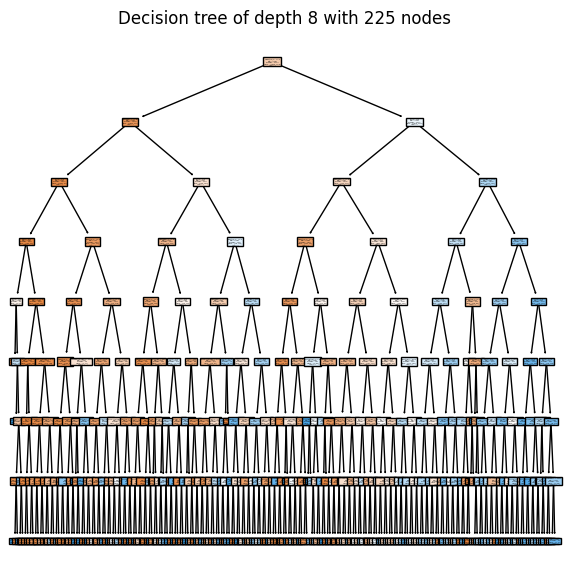

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth 8
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [30]:
plot_decision_tree(estimator.best_estimator_, feature_names)